In [10]:
!pip install geopandas
!pip install folium

        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

<Axes: >

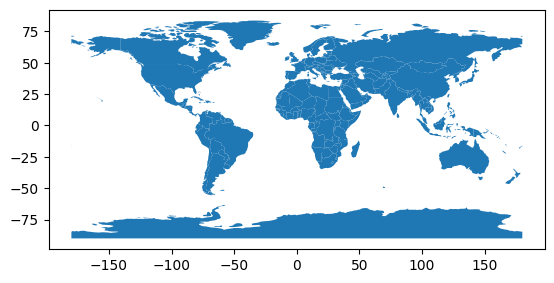

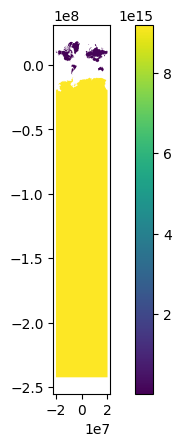

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import geopandas as gpd
import folium

url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

print(world.head())
world.plot()

print("Current CRS:", world.crs)

world_projected = world.to_crs(epsg=3857)

world_projected["area_m2"] = world_projected.geometry.area

print(world_projected[["ADMIN", "area_m2"]].head())
print("\nArea Reprojection Complete")

world_projected["centroid"] = world_projected.geometry.centroid
world_projected["x"] = world_projected.centroid.x
world_projected["y"] = world_projected.centroid.y

print(world_projected[["ADMIN", "x", "y"]].head())

top10 = world_projected.sort_values(by="area_m2", ascending=False).head(10)
top10.plot(column="area_m2", legend=True)

**Task 2: Load Natural Earth Dataset**
1. How many columns does the dataset contain?
The dataset contains around 60 or more columns that include country attributes and one geometry column. These columns store both descriptive information and spatial data.
2. What type of geometries are included?
The dataset includes Polygon and MultiPolygon geometries. This is because countries are represented by boundary shapes, and some countries consist of multiple islands or separated land areas.
3. What does the geometry column represent?
The geometry column represents the spatial shape or boundary of each country. It contains the coordinate data that allows the countries to be displayed on a map.

**Task 3: Check the Coordinate Reference System**
1. What does EPSG:4326 represent?
EPSG:4326 represents the WGS 84 geographic coordinate system. It uses latitude and longitude measured in degrees to define locations on Earth.
2. Why is CRS important in spatial analysis?
CRS is important because it ensures that spatial data is correctly aligned and positioned on the map. It also allows accurate calculations of distance and area when the correct projection is used.

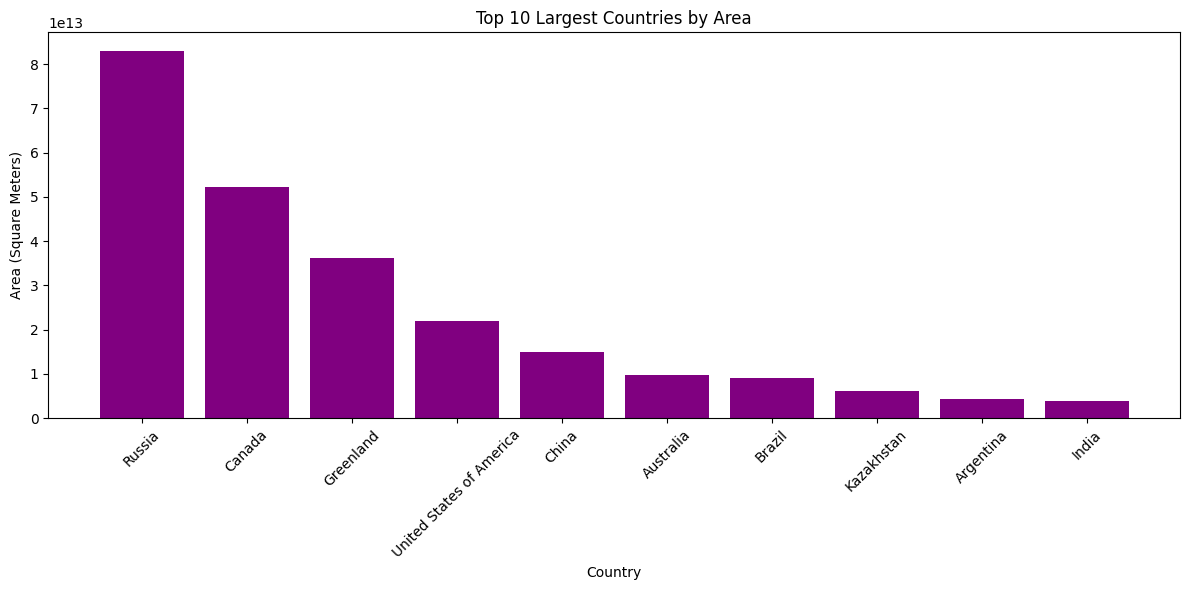

In [16]:
import matplotlib.pyplot as plt

world_no_antarctica = world_projected[world_projected['ADMIN'] != 'Antarctica']
top_10_countries = world_no_antarctica.nlargest(10, 'area_m2')

plt.figure(figsize=(12, 6))
plt.bar(top_10_countries['ADMIN'], top_10_countries['area_m2'], color='purple')
plt.title('Top 10 Largest Countries by Area')
plt.xlabel('Country')
plt.ylabel('Area (Square Meters)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Task 4: Convert to Metric CRS for Area Calculation**
1. Why can’t we compute area accurately using EPSG:4326?
We cannot compute area accurately using EPSG:4326 because it uses degrees instead of meters. Degrees do not represent consistent distances across the Earth, which leads to incorrect area measurements.
2. What unit is EPSG:3857 based on?
EPSG:3857 is based on meters as its unit of measurement. This makes it more suitable for calculating area in square meters and distance measurements.

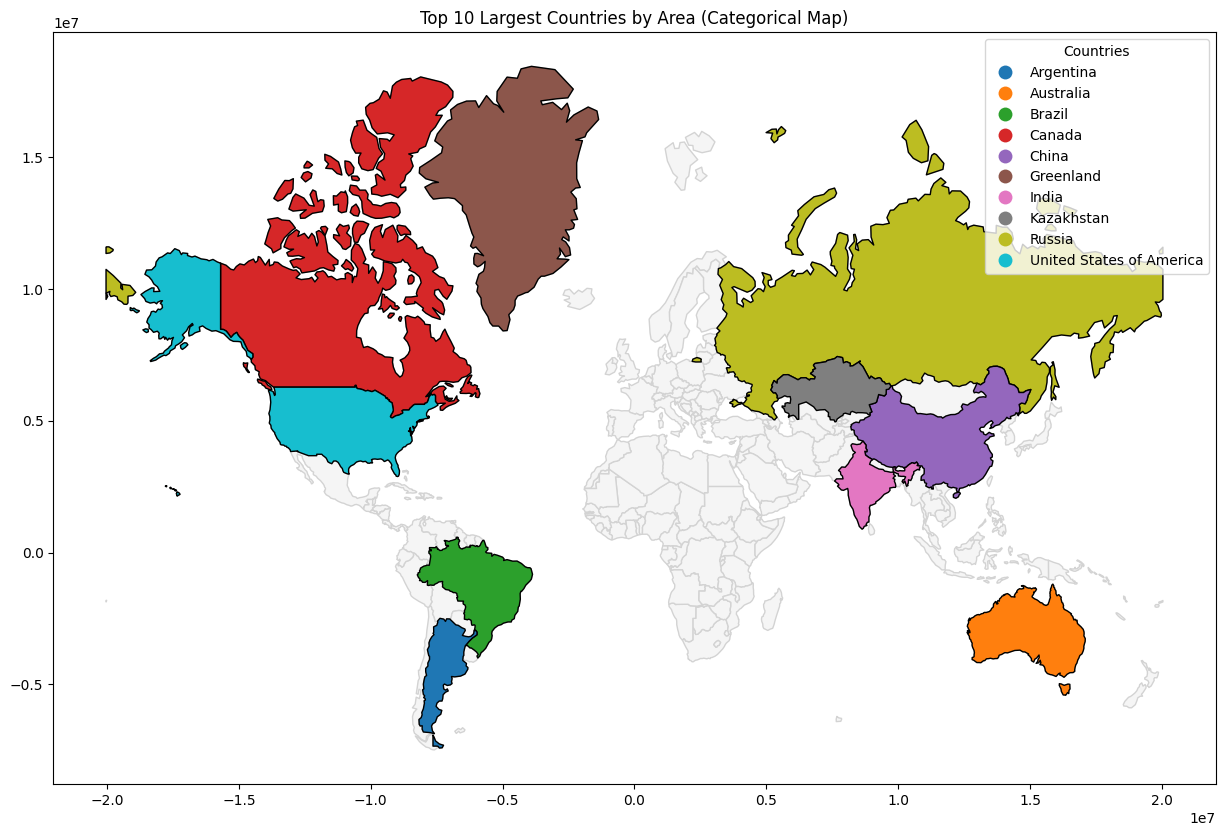

In [13]:

ax = world_no_antarctica.plot(figsize=(15, 10), color='whitesmoke', edgecolor='lightgrey')

top_10_countries.plot(
    ax=ax,
    column='ADMIN',
    legend=True,
    categorical=True,
    cmap='tab10',
    edgecolor='black',
    legend_kwds={'title': 'Countries', 'bbox_to_anchor': (1, 1)}
)

plt.title('Top 10 Largest Countries by Area (Categorical Map)')
plt.show()

**Task 5: Extract Centroid Coordinates**
1. What is a centroid?
A centroid is the geometric center point of a polygon or spatial shape. It represents the average location of all points within the shape.
2. How can centroid coordinates be used in clustering?
Centroid coordinates provide numerical X and Y values that represent geographic location. These values can be used as features in clustering algorithms to group countries based on spatial proximity.
3. Why do we extract X and Y separately?
We extract X and Y separately because machine learning models require numerical features in individual columns. Separating them makes the data easier to process and analyze.

**Reflection**

One difficulty I encountered was understanding why we needed to remove Antarctica before getting the top 10 largest countries. I realized that Antarctica has a very large area and could affect the comparison, so excluding it made the ranking more realistic. I also learned that computing area requires converting the CRS to EPSG:3857 because EPSG:4326 uses degrees, which are not accurate for area measurement. Extracting centroids helped me understand how spatial data can be converted into numerical features like X and Y coordinates for machine learning. Overall, this activity improved my understanding of geospatial data processing, projection systems, and spatial visualization.